# Seek Market Analysis
#### Collaborators:
James Rutherford - s5132147 - james.rutherford@griffithuni.edu.au  
Zakaria Wardere - s5302830 - zakaria.wardere@griffithuni.edu.au

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1

Prepare the data and pre-process for future analysis.

## Importing the dataset and examining the first few rows of data.

In [54]:
df = pd.read_csv('data.csv')

C:\Users\jruth\AppData\Local\Temp\ipykernel_25608\1507164070.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [55]:
print("The dataset contains:", df.shape[0], " rows and ", df.shape[1], " columns.")
df.head(5)

The dataset contains: 318477  rows and  13  columns.


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


## Checking the data time range of the dataset.

In [56]:
dateRange = df.sort_values('Date')['Date'].dropna().unique()
startDate = dateRange[0]
endDate = dateRange[-1]
print("The dataset contains data from ", startDate, " to ", endDate)

The dataset contains data from  2018-10-01T00:00:00.000Z  to  2019-03-13T00:00:00.000Z


## Checking for unique values in each column.

In [57]:
print("The dataset contains the following unique values for each column:")
for column in df.columns:
    print(column, "->",df[column].nunique())

The dataset contains the following unique values for each column:
Id -> 318477
Title -> 168065
Company -> 40628
Date -> 163
Location -> 65
Area -> 19
Classification -> 30
SubClassification -> 338
Requirement -> 234287
FullDescription -> 250901
LowestSalary -> 11
HighestSalary -> 11
JobType -> 4


## Checking for total values in each column.

In [58]:
print("The dataset contains the following number of values for each column:")
for column in df.columns:
    print(column, "->",df[column].count())

The dataset contains the following number of values for each column:
Id -> 318477
Title -> 318477
Company -> 306473
Date -> 318477
Location -> 197229
Area -> 122658
Classification -> 197229
SubClassification -> 197229
Requirement -> 318470
FullDescription -> 302302
LowestSalary -> 318477
HighestSalary -> 318477
JobType -> 302379


## Dataset Characteristics
The dataset contains 318477 job postings from the Seek job search website. The timeframe of the job postings was between 01/10/2018 - 13/03/2019. Each job posting consists of 13 attributes, upon initial investigation of the dataset, we can see that there are missing values in a number of the columns. Also there was a data type warning flagged when loading the in dataset for the ID, Location, Area, Classification and Subclassification columns (0, 4, 5, 6, 7). This will be investigated further in the next section, along with the missing values.

**The 13 attributes that make up each job, the number of unique values and number of total values are as follows:**
| Attribute | No. of Variations | No. of Total Values |
| --- | --- | --- |
| ID | 318477 | 318477 |
| Title | 168065 | 318477 |
| Company | 40628 | 306473 |
| Date | 163 | 318477 |
| Location | 65 | 197229 |
| Area | 19 | 122658 |
| Classification | 30 | 197229 |
| Sub-Classification | 338 | 197229 |
| Requirements | 234287 | 318470 |
| Full Description | 250901 | 302302 |
| Lowest Salary | 11 | 318477 |
| Highest Salary | 11 | 318477 |
| Job Type | 4 | 302379 |

- The **ID** column has 318,477 unique values and 318,477 total values. Each ID is specific to a job posting on Seek, making this column mostly useless for the index. Therefore, it will be dropped in the next section. (Type: Identifier)
- The **Title** column's high variation indicates diverse job titles, which may prove analysis on this variable fruitless as the variations arise from similar jobs listed under different titles by different companies. (Type: Categorical)
- The **Company** column has high variation and this suggests a wide range of companies posting job ads, useful for analyzing job postings across companies or identifying popular jobs by location or sector. (Type: Categorical)
- The **Date** column specifies the job posting date, useful for analyzing trends over time. However, the limited timeframe restricts long-term trend analysis. (Type: Date/Time)
- The **Location** column has 65 unique values and 197,229 total values. It specifies job locations, useful for geographical analysis to determine job market sizes in various locations. (Type: Categorical)
- The **Area** column has 19 unique values and 122,658 total values. It represents sub-regions within main locations, allowing for granular geographical analysis and understanding job distribution within broader regions. However, there is a significant amount of data missing and the area may only be present in larger cities. (Type: Categorical)
- The **Classification** column has 30 unique and categorizes jobs into different sectors, vital for sector-wise analysis to identify which sectors have the most job postings. (Type: Categorical)
- The **Sub-Classification** column has 338 unique values and 197,229 total values. It provides detailed categorization within main classifications, allowing deeper analysis of specific job roles within broader sectors. (Type: Categorical)
- The **Requirements** column has 234,287 unique values and 318,470 total values. It lists job requirements, useful for revealing common skills and qualifications demanded by employers, valuable for job seekers and educational institutions. (Type: Text)
- The **Full Description** column has 250,901 unique values and 302,302 total values. It contains detailed job descriptions, providing insights into job roles, responsibilities, and specific job-related terms and phrases. (Type: Text)
- The **Lowest Salary** and **Highest Salary** columns have 11 unique values and 318,477 total values. It shows the minimum/maximum salary offered, helping to understand lower/upper bounds of compensation to analyze salary disparities. (Type: Numerical)
- The **Job Type** column has 4 unique values and categorizes jobs by type (e.g., full-time, part-time, contract), useful for understanding the distribution of employment types and analyzing potential relationships between salaries and job types. (Type: Categorical)

## Data Prep and Preprocessing

Removing the Id column as it is not needed for the analysis.

In [59]:
print('Removing the Id column changs the df shape from: ', df.shape[1], ' to ', df.drop('Id', axis=1).shape[1])
df.drop('Id', axis=1, inplace=True)

Removing the Id column changs the df shape from:  13  to  12


## Checking data types

In [60]:
df.dtypes

Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

The Date column is currently an object data type, this will be converted to a datetime data type for further analysis and more indepth analysis. 

In [61]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

datetime64[ns, UTC]

## Check Duplicates and Missing Data

### Duplicates

In [63]:
# Check for duplicates in each column
dup_count = df[df.duplicated()].shape[0]
print("The dataset contains ", dup_count, " duplicates.")

The dataset contains  8607  duplicates.


### Missing Data

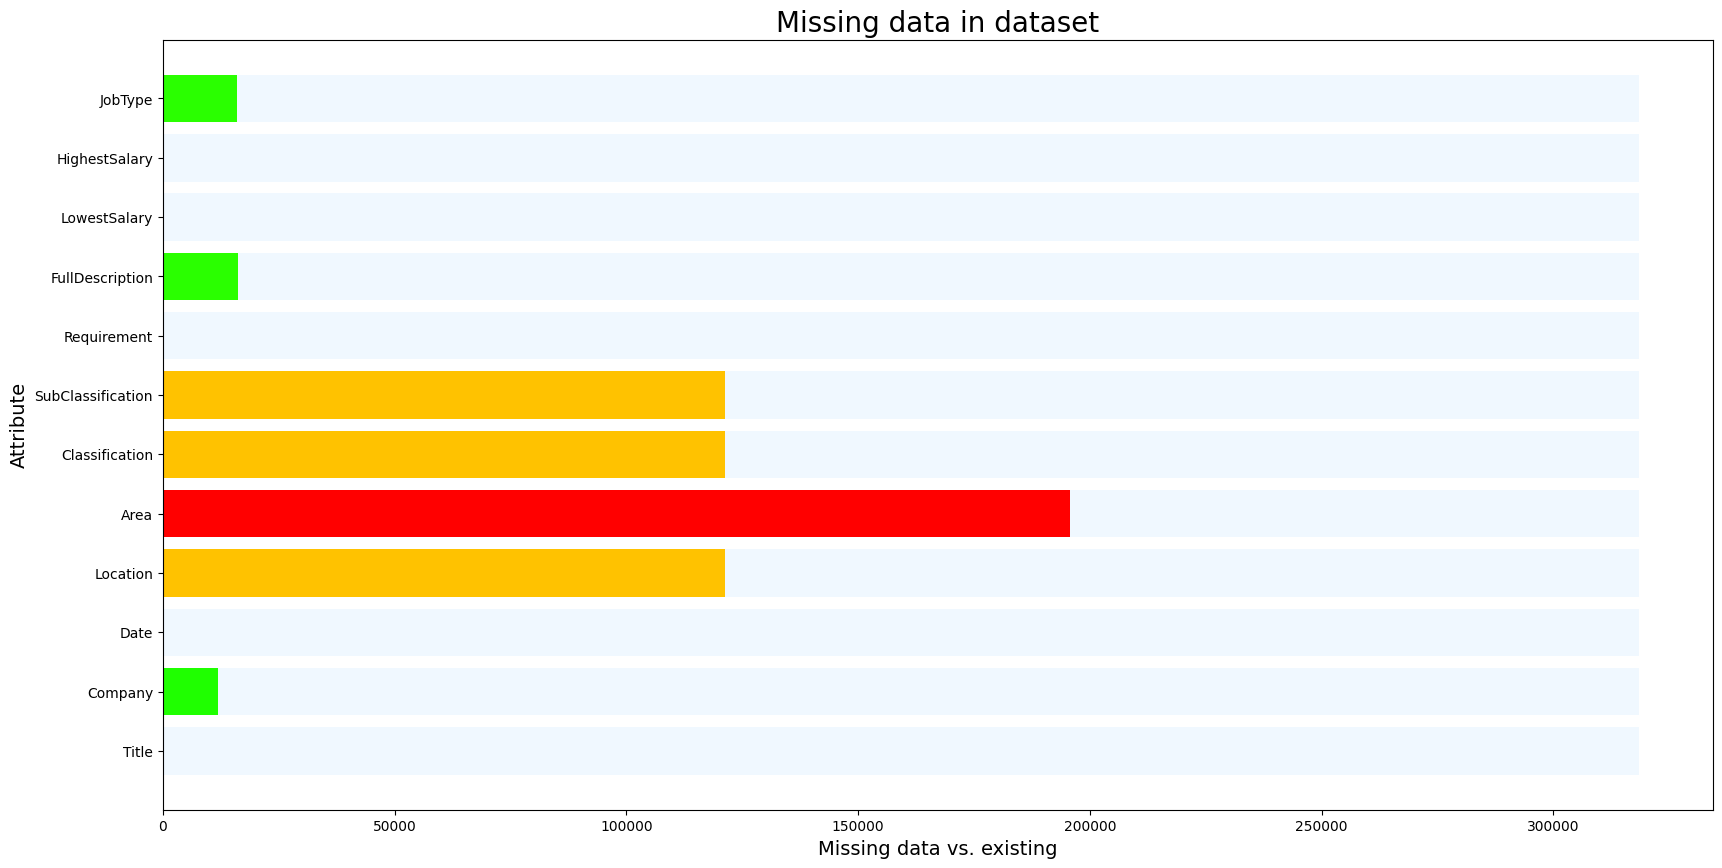

In [73]:
def get_gradient_color(value, max_value):
    normalized_value = value / max_value
    red = min(1, 2 * normalized_value)  # Gradient black -> red
    green = min(1, 2 * (1 - normalized_value))  # Gradient black -> green
    return (red, green, 0)

nulls = df.isnull().sum()
cols = [get_gradient_color(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20, 10))
plt.barh(df.columns.values, total_data, color='aliceblue')

for idx, (column, null_count, color) in enumerate(zip(df.columns.values, nulls, cols)):
    plt.barh(column, null_count, color=color, edgecolor='none')

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show()

### Find the proportion of missing data in each column

In [76]:
total_jobs = df.shape[0]
print('Missing data in attributes:')
for column, null_count in zip(df.columns.values, nulls):
    if null_count > 0:
        print(column, '->', round(null_count / total_jobs * 100, 3), '%')

Missing data in attributes:
Company -> 3.769 %
Location -> 38.071 %
Area -> 61.486 %
Classification -> 38.071 %
SubClassification -> 38.071 %
Requirement -> 0.002 %
FullDescription -> 5.079 %
JobType -> 5.055 %


Talk about area missing so much data, and how we will deal with it.
discuss location, classification, and sub-classification. Seems weird that all three have the exact same number of missing data. 

### Investigation missing area

In [95]:
df_missing = df[df['Area'].notnull() & df['Location'].notnull()]
print("The dataset contains ", df_missing['Location'].nunique(), " unique values where both Area and Location columns are missing.")
print(df_missing['Location'].unique())

The dataset contains  4  unique values where both Area and Location columns are missing.
['Sydney' 'Brisbane' 'Melbourne' 'Perth']


### Investigating missing Location, Classification, and Sub-Classification

The dataset contains 4 unique values with non-missing location, area, classification and sub-classification.
These are:
